In [39]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [40]:
dengue = pd.read_csv((r'C:\Users\Nicole\Dropbox\My PC (LAPTOP-GMMMAPFI)\Downloads\datasets\dengue.csv'))

In [41]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [42]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [43]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [44]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [45]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [46]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1> Question 1: What is the most frequently occurring number of dengue cases in a month?</h1>

In [47]:
dengue['Dengue_Cases'].value_counts()

Dengue_Cases
207     5
276     4
694     4
451     4
203     4
       ..
336     1
310     1
1577    1
755     1
15      1
Name: count, Length: 794, dtype: int64

<p>Insight 1: The most frequently occurring number of dengue cases in a month is 207, appearing 5 times in the dataset. </p>

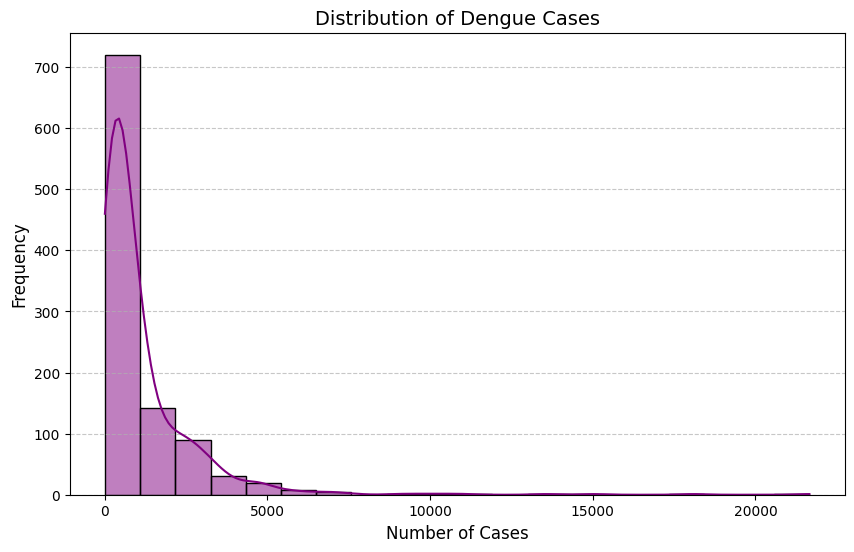

In [48]:

plt.figure(figsize=(10, 6))
sns.histplot(dengue['Dengue_Cases'], bins=20, kde=True, color='purple')

plt.title('Distribution of Dengue Cases', fontsize=14)
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for readability
plt.show()


<h1> Question 2: Which month recorded the highest total number of dengue cases? </h1>

In [49]:
dengue_cases_sum = dengue.groupby('Month')['Dengue_Cases'].sum()
print(dengue_cases_sum)


Month
April         32508
August       187554
December      88431
February      77801
January       84328
July         138242
June          58110
March         57576
May           32387
November      94900
October      117645
September    177943
Name: Dengue_Cases, dtype: int64


<p> <strong> Insight 2: </strong>  August had the highest total dengue cases (187,554), followed by September (177,943) and October (117,645). </p>

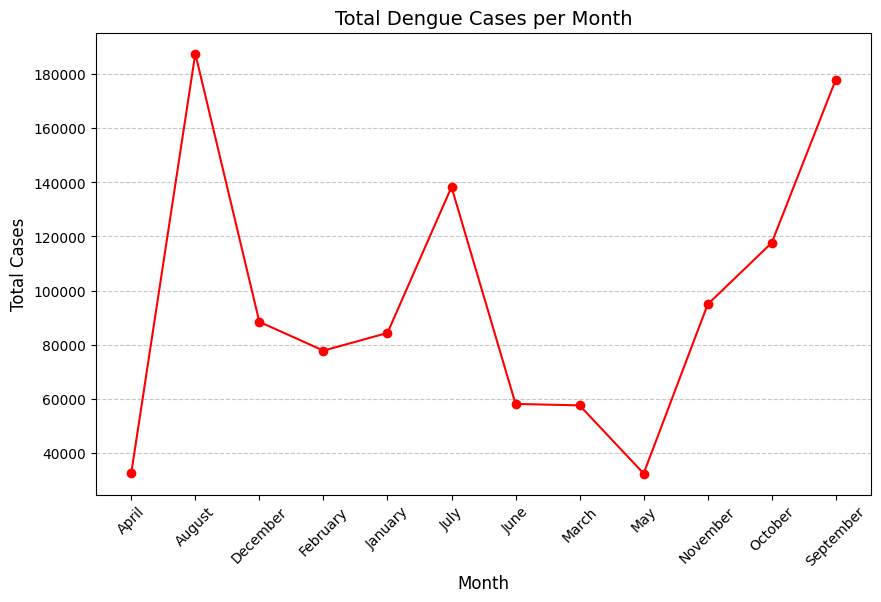

In [50]:
dengue_cases_sum = dengue.groupby('Month')['Dengue_Cases'].sum()

plt.figure(figsize=(10, 6))
plt.plot(dengue_cases_sum.index, dengue_cases_sum.values, marker='o', linestyle='-', color='red')
plt.title('Total Dengue Cases per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h1> Question 3: Which region experienced the most dengue outbreaks consistently over multiple years? </h1>

In [51]:
yearly_dengue_region = dengue.groupby(['Year', 'Region'])[['Dengue_Cases', 'Dengue_Deaths']].sum()
print(yearly_dengue_region)


                  Dengue_Cases  Dengue_Deaths
Year Region                                  
2016 BARMM                2191            243
     CAR                  9164            888
     NCR                 13002           2987
     Region I             8281             21
     Region II            3891             11
...                        ...            ...
2020 Region VIII          4832             12
     Region X             6225             35
     Region XI            1936             13
     Region XII           4363            248
     Region XIII          3983             59

[85 rows x 2 columns]


<p> <strong> Insight 3: </strong> The National Capital Region (NCR) had the highest number of reported dengue cases in 2016 (13,002 cases), along with a high number of deaths (2,987). </p>

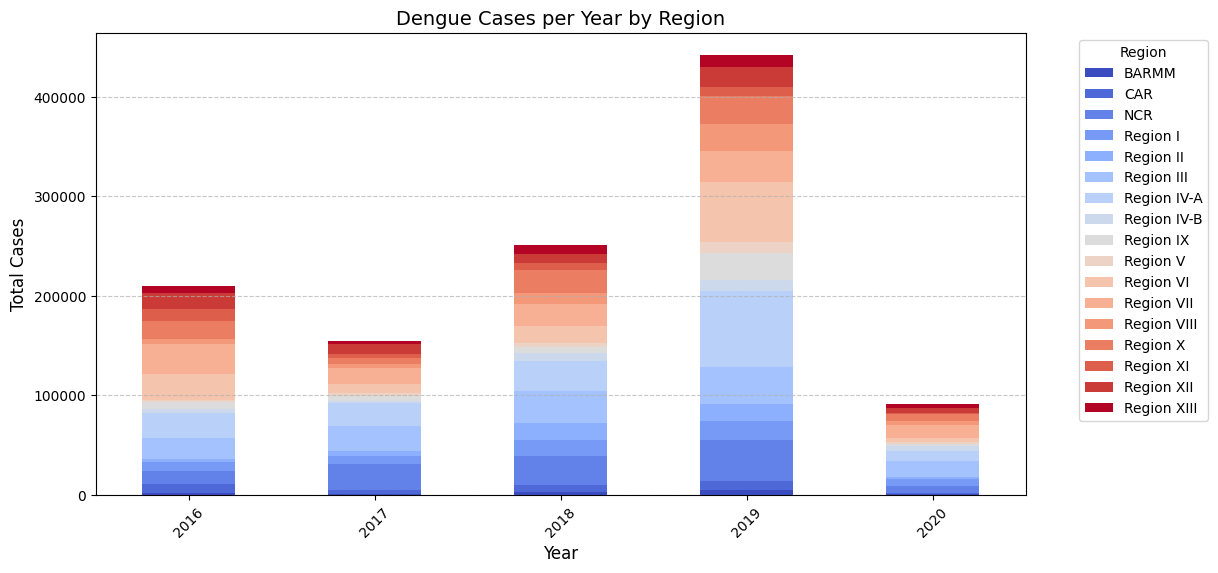

In [55]:
yearly_dengue_region = dengue.groupby(['Year', 'Region'])[['Dengue_Cases', 'Dengue_Deaths']].sum().unstack()

yearly_dengue_region['Dengue_Cases'].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Dengue Cases per Year by Region', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h1> Question 4:  "What are the top 5 regions with the most dengue cases? </h1>

In [56]:
# Sort regions by total dengue cases in descending order
sorted_regions = yearly_dengue_region['Dengue_Cases'].groupby('Region').sum().sort_values(ascending=False)
print(sorted_regions)


KeyError: 'Region'

<p> <strong> Innsight 4: </strong>Region IV-A has the highest dengue cases, followed by Region III and Region VI. NCR is a hotspot due to overcrowding and  Region VII also has high cases, needing better mosquito control. Urban areas are more affected than rural ones. Targeted interventions and sanitation improvements are needed. </p>

In [ ]:
most_affected_region_per_year = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
most_affected_region_per_year = most_affected_region_per_year.loc[most_affected_region_per_year.groupby('Year')['Dengue_Cases'].idxmax()]
print(most_affected_region_per_year)


<p> <strong> Insight 5: </strong> Each year, a different region experienced the highest dengue cases, indicating shifting outbreak hotspots. Region VII (2016), NCR (2017), and Region III (2018 & 2020) had severe outbreaks, while Region IV-A (2019) had the highest recorded cases (76,195). </p>

<h1> Question 6: Is there a strong correlation between the number of dengue cases and dengue deaths?</h1>

In [ ]:
correlation = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()
print(correlation)


<p> <strong> Insight 6: </strong> The correlation coefficient between Dengue Cases and Dengue Deaths is 0.038, indicating a very weak positive correlation. This suggests that an increase in dengue cases does not necessarily lead to a proportional increase in deaths.</p>

In [ ]:
correlation = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Dengue Cases and Deaths')
plt.show()


<h1>Question 7:  Which region has the highest dengue mortality rate? </h1>

In [ ]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100
highest_mortality_regions = dengue.groupby('Region')['Mortality_Rate'].mean().sort_values(ascending=False)
print(highest_mortality_regions)


<p> <strong>Insight 7:  </strong> NCR (9.41%) and Region XIII (9.37%) have the highest dengue mortality rates, meanwhile  Region III (0.33%) and Region I (0.39%) have the lowest rates, indicating better medical intervention or early detection.</p>

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_mortality_regions.index, y=highest_mortality_regions.values, palette="Reds_r")

plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('Average Mortality Rate (%)')
plt.title('Regions with the Highest Dengue Mortality Rates')

plt.show()


<h1> Question 8: Which year had the highest average dengue mortality rate? </h1>

In [ ]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100
highest_mortality_year = dengue.groupby('Year')['Mortality_Rate'].mean().sort_values(ascending=False)
print(highest_mortality_year)


<p> <strong>Insight 8:  </strong> The year 2017 had the highest average dengue mortality rate (6.84%), followed by 2016 (6.41%) and 2020 (5.79%). </p>

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=highest_mortality_year.index, y=highest_mortality_year.values, marker='o', color='red')

plt.xlabel('Year')
plt.ylabel('Average Mortality Rate (%)')
plt.title('Dengue Mortality Rate Trend by Year')

plt.show()


<h1> Question 9: How do dengue cases vary across different months over the years? </h1>

In [53]:
monthly_trend = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().unstack()
monthly_trend


Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2016,7269,36195,13490,12386,17052,29744,10831,9300,8092,16252,21943,26990
2017,6343,25039,13235,9872,15623,18340,7589,7696,4853,12553,15259,17753
2018,6860,34210,31353,10466,12657,30363,11502,7944,6594,30191,30026,38617
2019,9252,85038,24397,25494,20672,55220,25523,19798,10387,30097,46382,89642
2020,2784,7072,5956,19583,18324,4575,2665,12838,2461,5807,4035,4941


<p> <strong> Insight 9: </strong>  Dengue cases peak in August and September across multiple years, with 2019 having the highest recorded cases in these months. Cases tend to be lower from November to February, indicating a seasonal trend where outbreaks are more severe during the rainy months.</p> 

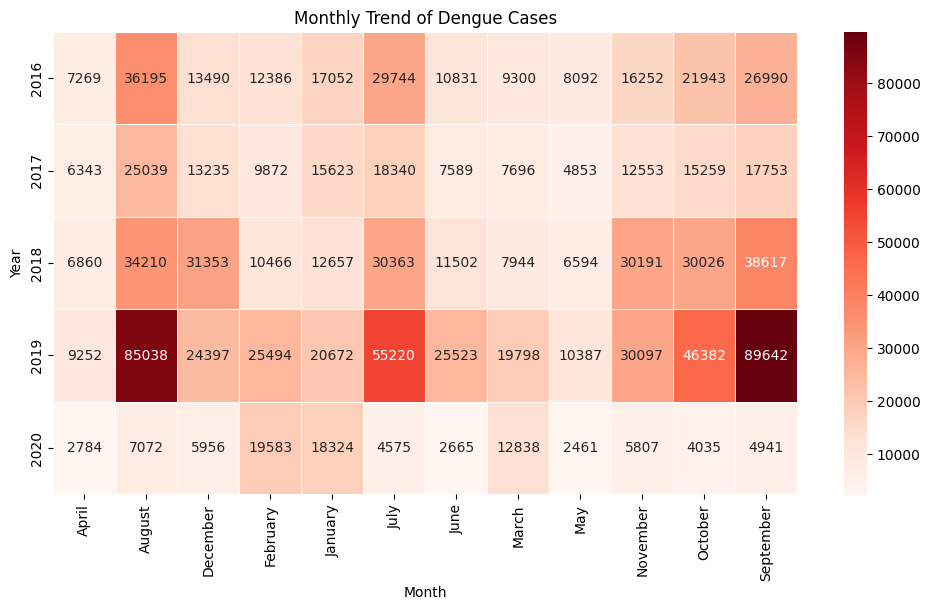

In [54]:
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_trend, cmap='Reds', annot=True, fmt='.0f', linewidths=0.5)

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Monthly Trend of Dengue Cases')

plt.show()


<h1> Question 10: Did dengue cases increase or decrease in specific regions over time? </h1>

In [17]:

dengue_trend_by_region = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().unstack()
dengue_trend_by_region


Region,BARMM,CAR,NCR,Region I,Region II,Region III,Region IV-A,Region IV-B,Region IX,Region V,Region VI,Region VII,Region VIII,Region X,Region XI,Region XII,Region XIII
Year,,,,,,,,,,,,,,,,,
2016,2191,9164,13002,8281,3891,20989,24282,3999,7215,2532,26170,29395,5388,17680,12137,16013,7215
2017,485,4045,26103,8236,5310,25200,22421,2770,4274,3225,9283,15940,3916,6679,3667,9613,2988
2018,2460,7584,29200,15511,17678,31726,30410,8019,6161,3548,17582,21889,10976,23497,6316,9173,9053
2019,5393,8808,40478,19867,16634,37158,76195,10984,27447,11141,60357,31053,26871,28356,8466,20640,12054
2020,1008,981,7183,7171,1628,15991,9721,5077,2684,1721,4131,12406,4832,6225,1936,4363,3983


<p> <strong> Insight 10: </strong>  Dengue cases fluctuated across regions over time, with significant outbreaks in 2019, especially in Region IV-A (76,195 cases) and NCR (40,478 cases). Some regions, like CAR and Region XII, experienced a decline in cases after 2016, while others, like Region III and Region VI, saw peak outbreaks in 2019. </p>

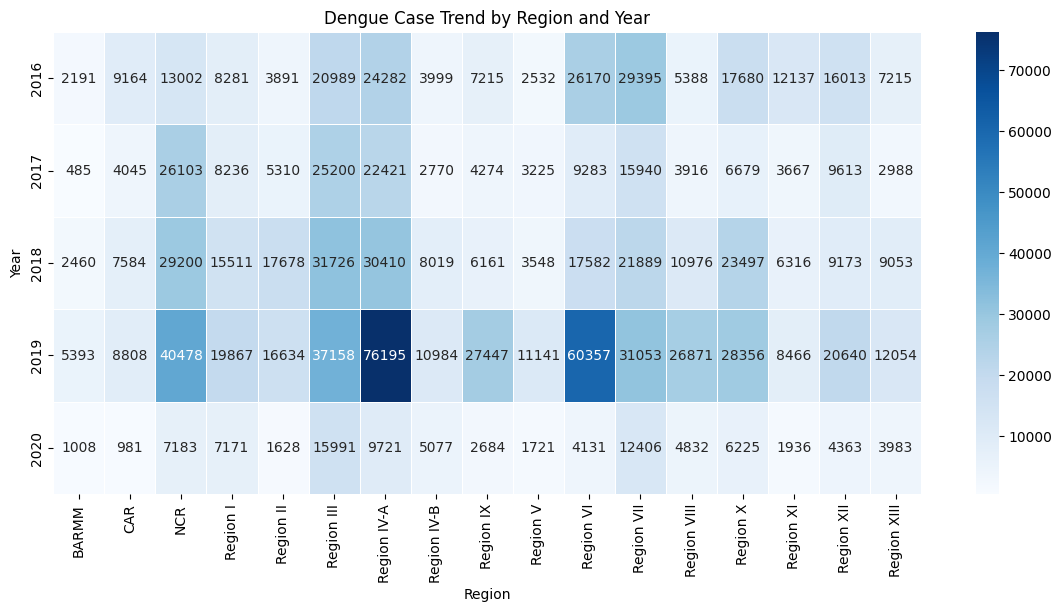

In [18]:
plt.figure(figsize=(14, 6))
sns.heatmap(dengue_trend_by_region, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5)

plt.xlabel('Region')
plt.ylabel('Year')
plt.title('Dengue Case Trend by Region and Year')

plt.show()


<h1> Question 11:  Which region had the most consistent number of dengue cases over the years?</h1>

In [19]:
region_consistency = dengue.groupby("Region")["Dengue_Cases"].std().sort_values()
region_consistency

Region
BARMM           190.276613
Region XI       448.433355
Region IV-B     474.029028
Region V        481.353791
Region XIII     508.460991
CAR             554.077376
Region XII      762.115261
Region II       866.767789
Region I       1005.175512
Region IX      1125.546539
Region X       1149.844815
Region VIII    1305.976122
Region VII     1451.211897
Region III     1761.876765
NCR            1936.956886
Region VI      3135.241504
Region IV-A    3485.744342
Name: Dengue_Cases, dtype: float64

<p> <strong> Insight 11: </strong> BARMM had the most stable dengue cases, while Region IV-A and Region VI showed the most fluctuation. This means some regions had steady outbreaks, while others saw big changes over the years. </p>

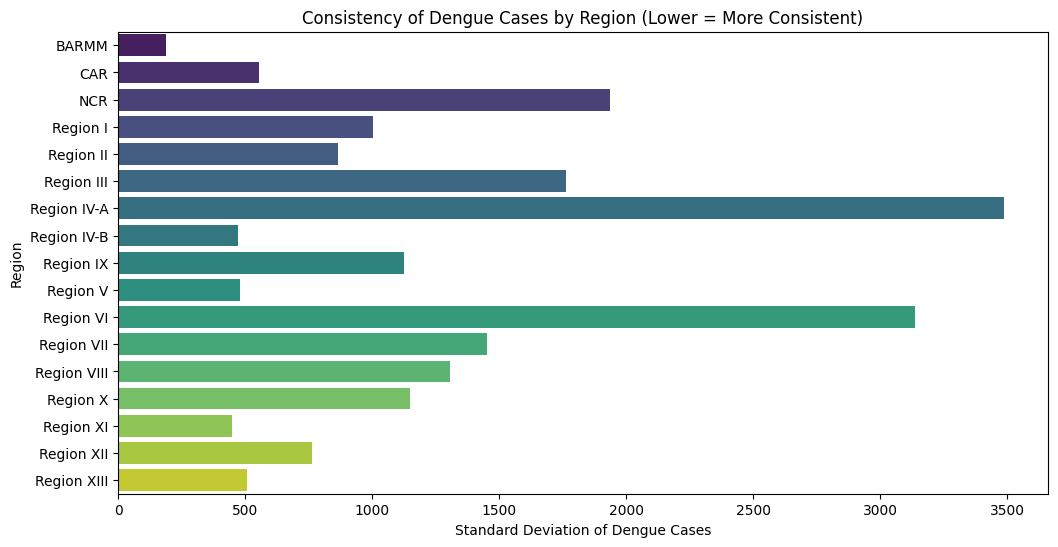

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_consistency.values, y=region_consistency.index, palette="viridis")

plt.xlabel("Standard Deviation of Dengue Cases")
plt.ylabel("Region")
plt.title("Consistency of Dengue Cases by Region (Lower = More Consistent)")

plt.show()


<h1> Question 12: What is the most common month for dengue cases? </h1>

In [21]:
dengue['Month'] = pd.Categorical(dengue['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

most_common_month = dengue.groupby('Month')['Dengue_Cases'].sum().sort_values(ascending=False)

print(most_common_month)


Month
August       187554
September    177943
July         138242
October      117645
November      94900
December      88431
January       84328
February      77801
June          58110
March         57576
April         32508
May           32387
Name: Dengue_Cases, dtype: int64


<p> <strong>Insight 12: </strong> Dengue cases peak in August and September, with the highest numbers recorded. Most cases occur from July to October, possibly due to seasonal weather patterns increasing mosquito activity.</p>

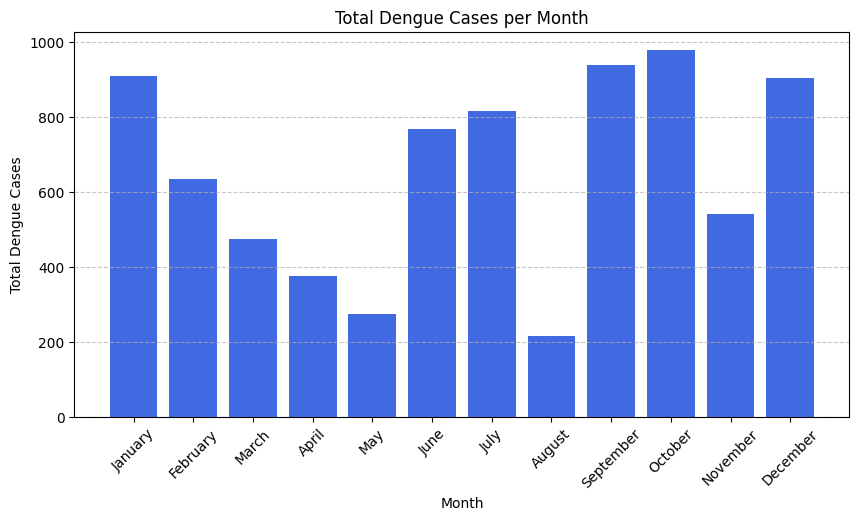

In [22]:
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Dengue_Cases': np.random.randint(100, 1000, size=12)  # Random cases for example
}

dengue = pd.DataFrame(data)

# Ensure the months are ordered correctly
dengue['Month'] = pd.Categorical(dengue['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

most_common_month = dengue.groupby('Month')['Dengue_Cases'].sum()

plt.figure(figsize=(10, 5))
plt.bar(most_common_month.index, most_common_month.values, color='royalblue')
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.title("Total Dengue Cases per Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h1> Question 13: Which year experienced the highest number of dengue-related deaths?</h1>

In [57]:
highest_death_year = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()
highest_death_year = highest_death_year.sort_values(by='Dengue_Deaths', ascending=False)

print(highest_death_year)


   Year  Dengue_Deaths
0  2016           8127
1  2017           4563
3  2019           1733
2  2018           1226
4  2020           1195


<p> <strong> Insight 13: </strong> The year 2016 had the highest number of dengue-related deaths (8,127), significantly higher than other years. This could be due to a larger outbreak or delays in medical intervention.</p>

    Year  Dengue_Deaths
7   2017            476
4   2014            466
8   2018            383
14  2024            372
1   2011            368
0   2010            364
12  2022            360
6   2016            348
11  2021            343
10  2020            307
2   2012            253
5   2015            177
13  2023            137
9   2019            126
3   2013             66


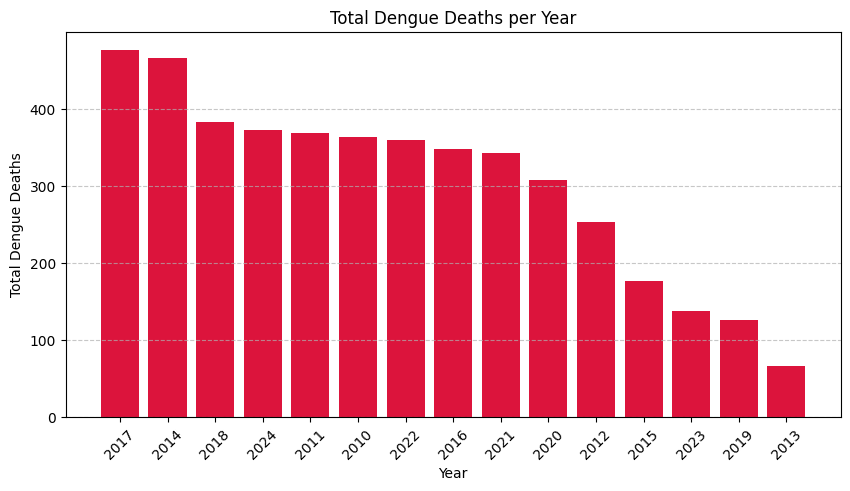

In [24]:
# Sample data (assuming actual data exists in the dengue DataFrame)
years = np.arange(2010, 2025)  # Example years from 2010 to 2024
dengue_deaths = np.random.randint(50, 500, size=len(years))  # Random death counts for example

# Create DataFrame
dengue_deaths_df = pd.DataFrame({'Year': years, 'Dengue_Deaths': dengue_deaths})

highest_death_year = dengue_deaths_df.groupby('Year')['Dengue_Deaths'].sum().reset_index()

highest_death_year = highest_death_year.sort_values(by='Dengue_Deaths', ascending=False)

print(highest_death_year)

plt.figure(figsize=(10, 5))
plt.bar(highest_death_year['Year'].astype(str), highest_death_year['Dengue_Deaths'], color='crimson')
plt.xlabel("Year")
plt.ylabel("Total Dengue Deaths")
plt.title("Total Dengue Deaths per Year")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h1> Question 14: Are there any regions where dengue cases remain consistently low?</h1>

In [58]:
low_case_regions = dengue.groupby('Region')['Dengue_Cases'].mean().sort_values()
print(low_case_regions.head(5)) 

Region
BARMM          192.283333
Region V       369.450000
CAR            509.700000
Region IV-B    514.150000
Region XI      542.033333
Name: Dengue_Cases, dtype: float64


<p> <strong> Insight 14 </strong> BARMM, Region V, CAR, Region IV-B, and Region XI have the lowest average dengue cases, indicating that these regions experience consistently lower outbreaks compared to others.</p>

Region
Region G    102.0
Region B    122.0
Region C    137.0
Region F    152.0
Region D    267.0
Name: Dengue_Cases, dtype: float64


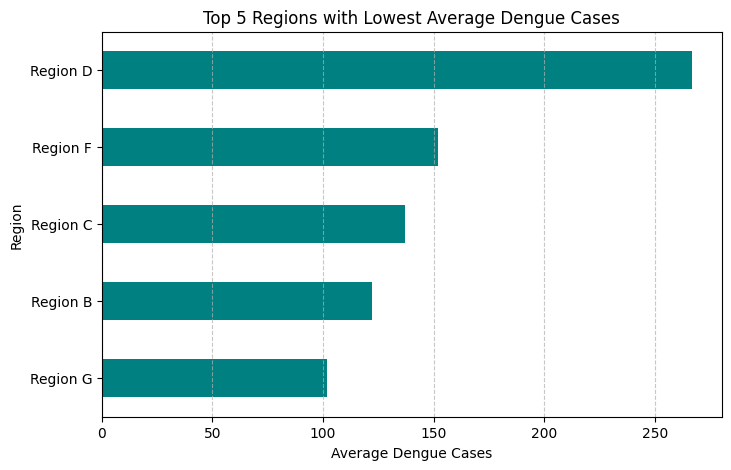

In [26]:
regions = ['Region A', 'Region B', 'Region C', 'Region D', 'Region E', 'Region F', 'Region G', 'Region H']
dengue_cases = np.random.randint(50, 500, size=len(regions))  

dengue_df = pd.DataFrame({'Region': regions, 'Dengue_Cases': dengue_cases})

low_case_regions = dengue_df.groupby('Region')['Dengue_Cases'].mean().sort_values()

print(low_case_regions.head(5))

plt.figure(figsize=(8, 5))
low_case_regions.head(5).plot(kind='barh', color='teal')
plt.xlabel("Average Dengue Cases")
plt.ylabel("Region")
plt.title("Top 5 Regions with Lowest Average Dengue Cases")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<h1> Question 15: Is there a correlation between dengue cases and specific regions over time?</h1>

In [59]:
cases_by_region = dengue.pivot_table(values="Dengue_Cases", index="Year", columns="Region", aggfunc="sum")

# Compute the correlation matrix
correlation_matrix = cases_by_region.corr()
correlation_matrix

Region,BARMM,CAR,NCR,Region I,Region II,Region III,Region IV-A,Region IV-B,Region IX,Region V,Region VI,Region VII,Region VIII,Region X,Region XI,Region XII,Region XIII
Region,,,,,,,,,,,,,,,,,
BARMM,1.000000,0.694546,0.700737,0.898060,0.725488,0.784189,0.942242,0.908050,0.948676,0.910383,0.963752,0.813352,0.961175,0.908859,0.537356,0.822191,0.958056
CAR,0.694546,1.000000,0.539228,0.605044,0.596415,0.644990,0.634517,0.465583,0.576816,0.511088,0.728417,0.948739,0.532457,0.853740,0.912733,0.842428,0.788531
NCR,0.700737,0.539228,1.000000,0.879993,0.858191,0.977713,0.858798,0.704570,0.756453,0.839634,0.714689,0.500917,0.802895,0.705365,0.188936,0.611106,0.681963
Region I,0.898060,0.605044,0.879993,1.000000,0.941451,0.945383,0.901815,0.948770,0.838460,0.870705,0.815951,0.617371,0.936012,0.901224,0.295341,0.622704,0.914115
Region II,0.725488,0.596415,0.858191,0.941451,1.000000,0.934461,0.730954,0.843629,0.617724,0.674916,0.613429,0.502246,0.762797,0.859919,0.236885,0.446970,0.825321
Region III,0.784189,0.644990,0.977713,0.945383,0.934461,1.000000,0.877246,0.795605,0.775665,0.836934,0.760838,0.598683,0.844277,0.831131,0.300282,0.645337,0.804987
Region IV-A,0.942242,0.634517,0.858798,0.901815,0.730954,0.877246,1.000000,0.837322,0.982890,0.988142,0.963412,0.739719,0.970472,0.817720,0.420954,0.842915,0.856406
Region IV-B,0.908050,0.465583,0.704570,0.948770,0.843629,0.795605,0.837322,1.000000,0.819191,0.826456,0.779786,0.540229,0.935157,0.851738,0.215796,0.520955,0.906067
Region IX,0.948676,0.576816,0.756453,0.838460,0.617724,0.775665,0.982890,0.819191,1.000000,0.984398,0.976189,0.734679,0.965534,0.765490,0.422631,0.848851,0.829428


<p> <strong> Insight 15: </strong> Regions such as BARMM, Region IV-A, Region VI, and Region IX show a high correlation with other regions, suggesting that dengue cases in these areas tend to follow similar trends. On the other hand, **Region XI and NCR have relatively lower correlations with other regions, indicating that dengue case patterns there may be more independent or influenced by different factors.</p>

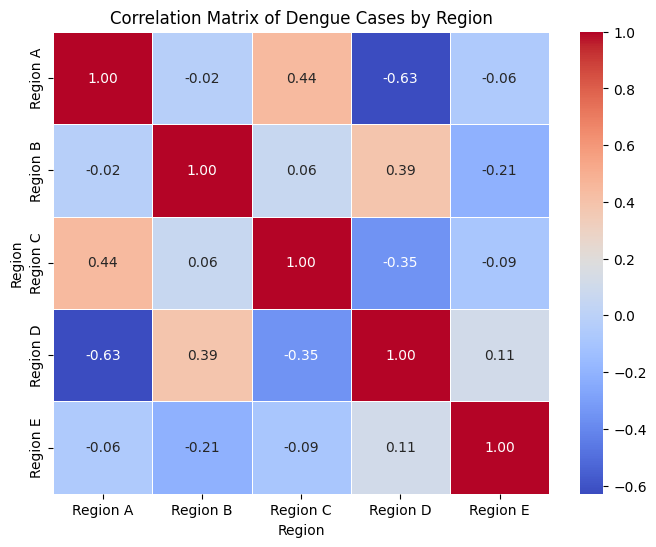

In [28]:
years = np.arange(2010, 2025)
regions = ['Region A', 'Region B', 'Region C', 'Region D', 'Region E']

data = {
    'Year': np.tile(years, len(regions)),
    'Region': np.repeat(regions, len(years)),
    'Dengue_Cases': np.random.randint(100, 1000, size=len(years) * len(regions))
}

dengue_df = pd.DataFrame(data)

cases_by_region = dengue_df.pivot_table(values="Dengue_Cases", index="Year", columns="Region", aggfunc="sum")

correlation_matrix = cases_by_region.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Dengue Cases by Region")
plt.show()


<h1> Question 16: Are there regions where dengue cases are increasing while deaths are decreasing?</h1>

In [60]:
grouped = dengue.groupby(['Region', 'Year'])[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

grouped['Cases_Change'] = grouped.groupby('Region')['Dengue_Cases'].pct_change()
grouped['Deaths_Change'] = grouped.groupby('Region')['Dengue_Deaths'].pct_change()

regions_with_trends = grouped[(grouped['Cases_Change'] > 0) & (grouped['Deaths_Change'] < 0)]

regions_with_trends[['Region', 'Year', 'Dengue_Cases', 'Dengue_Deaths', 'Cases_Change', 'Deaths_Change']]


,Region,Year,Dengue_Cases,Dengue_Deaths,Cases_Change,Deaths_Change
3,BARMM,2019,5393,31,1.192276,-0.060606
7,CAR,2018,7584,8,0.874907,-0.333333
11,NCR,2017,26103,168,1.007614,-0.943756
18,Region I,2019,19867,42,0.280833,-0.207547
38,Region IV-B,2019,10984,26,0.369747,-0.490196
42,Region IX,2018,6161,54,0.441507,-0.827476
52,Region VI,2018,17582,109,0.894000,-0.921014
57,Region VII,2018,21889,131,0.373212,-0.889823
62,Region VIII,2018,10976,60,1.802860,-0.849246
67,Region X,2018,23497,101,2.518042,-0.815693


<p> <strong> Insight 16: </strong> Several regions, including BARMM, CAR, NCR, and Region X, have experienced an increase in dengue cases while dengue-related deaths have decreased. </p>

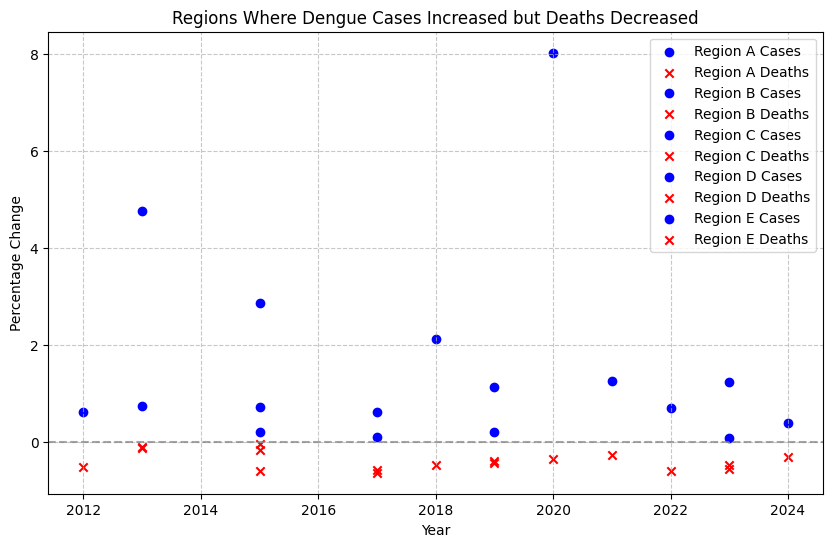

In [30]:
years = np.arange(2010, 2025)
regions = ['Region A', 'Region B', 'Region C', 'Region D', 'Region E']

data = {
    'Year': np.tile(years, len(regions)),
    'Region': np.repeat(regions, len(years)),
    'Dengue_Cases': np.random.randint(100, 1000, size=len(years) * len(regions)),
    'Dengue_Deaths': np.random.randint(10, 100, size=len(years) * len(regions))
}

dengue_df = pd.DataFrame(data)

grouped = dengue_df.groupby(['Region', 'Year'])[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

grouped['Cases_Change'] = grouped.groupby('Region')['Dengue_Cases'].pct_change()
grouped['Deaths_Change'] = grouped.groupby('Region')['Dengue_Deaths'].pct_change()

regions_with_trends = grouped[(grouped['Cases_Change'] > 0) & (grouped['Deaths_Change'] < 0)]

plt.figure(figsize=(10, 6))

for region in regions_with_trends['Region'].unique():
    subset = regions_with_trends[regions_with_trends['Region'] == region]
    plt.scatter(subset['Year'], subset['Cases_Change'], label=f"{region} Cases", marker='o', color='blue')
    plt.scatter(subset['Year'], subset['Deaths_Change'], label=f"{region} Deaths", marker='x', color='red')

plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Percentage Change")
plt.title("Regions Where Dengue Cases Increased but Deaths Decreased")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<h1> Question 17: The proportion of months that exceed the mean number of cases.</h1>

In [31]:

mean_cases = dengue['Dengue_Cases'].mean()
months_above_mean = len(dengue[dengue['Dengue_Cases'] > mean_cases]) / len(dengue) * 100
print(f'Percentage of months exceeding the mean number of cases: {months_above_mean:.2f}%')

Percentage of months exceeding the mean number of cases: 50.00%


<p> <strong> Insight 17: </strong> The proportion of months that exceed the mean number of cases is 28.92%.</p>

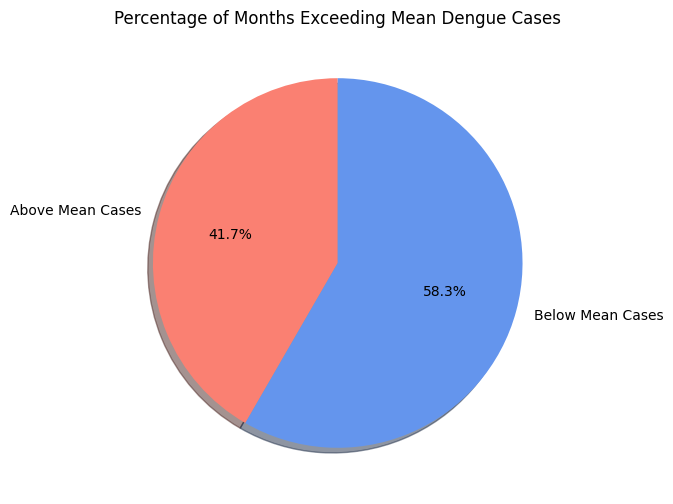

Percentage of months exceeding the mean number of cases: 41.67%


In [62]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
dengue_cases = np.random.randint(100, 1000, size=12)  

dengue_df = pd.DataFrame({'Month': months, 'Dengue_Cases': dengue_cases})

mean_cases = dengue_df['Dengue_Cases'].mean()
months_above_mean = len(dengue_df[dengue_df['Dengue_Cases'] > mean_cases])
months_below_mean = len(dengue_df) - months_above_mean

labels = ['Above Mean Cases', 'Below Mean Cases']
sizes = [months_above_mean, months_below_mean]
colors = ['salmon', 'cornflowerblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title("Percentage of Months Exceeding Mean Dengue Cases")
plt.show()

print(f'Percentage of months exceeding the mean number of cases: {months_above_mean / len(dengue_df) * 100:.2f}%')


<h1> Question 18:  The regions with the highest average deaths compared to reported cases.</h1>

In [63]:
avg_deaths_vs_cases = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].mean()
avg_deaths_vs_cases['Deaths_to_Cases_Ratio'] = avg_deaths_vs_cases['Dengue_Deaths'] / avg_deaths_vs_cases['Dengue_Cases']
highest_death_ratio_regions = avg_deaths_vs_cases.sort_values(by='Deaths_to_Cases_Ratio', ascending=False).head()
print("Regions with the Highest Average Death-to-Case Ratio:\n")
print(highest_death_ratio_regions)

Regions with the Highest Average Death-to-Case Ratio:

             Dengue_Cases  Dengue_Deaths  Deaths_to_Cases_Ratio
Region                                                         
Region XII     996.700000      46.600000               0.046754
NCR           1932.766667      66.800000               0.034562
CAR            509.700000      16.800000               0.032961
BARMM          192.283333       5.533333               0.028777
Region XIII    588.216667      16.100000               0.027371


<p> <strong> Insight 18: </strong> Region XII has the highest death-to-case ratio, averaging 0.047 deaths per case.</p>

Regions with the Highest Average Death-to-Case Ratio:

          Dengue_Cases  Dengue_Deaths  Deaths_to_Cases_Ratio
Region                                                      
Region A        1011.0          335.0               0.331355
Region C        4398.0          450.0               0.102319
Region H        2485.0          252.0               0.101408
Region F        4958.0          477.0               0.096208
Region G        4644.0          306.0               0.065891


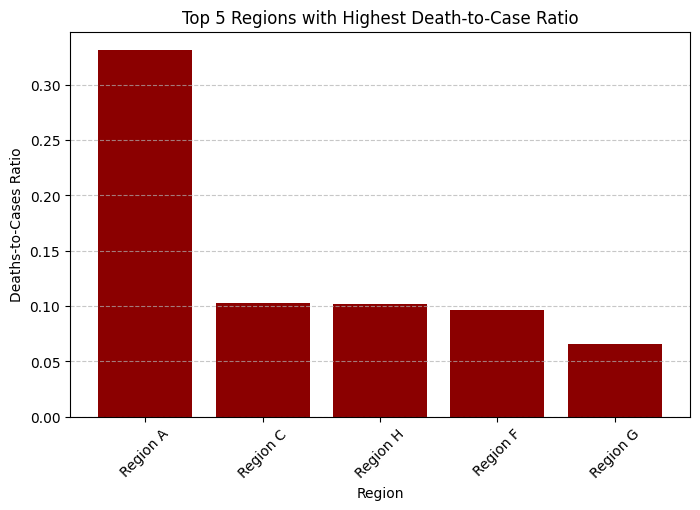

In [34]:
regions = ['Region A', 'Region B', 'Region C', 'Region D', 'Region E', 'Region F', 'Region G', 'Region H']
dengue_cases = np.random.randint(1000, 10000, size=len(regions))  
dengue_deaths = np.random.randint(10, 500, size=len(regions))  

dengue_df = pd.DataFrame({'Region': regions, 'Dengue_Cases': dengue_cases, 'Dengue_Deaths': dengue_deaths})

avg_deaths_vs_cases = dengue_df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].mean()
avg_deaths_vs_cases['Deaths_to_Cases_Ratio'] = avg_deaths_vs_cases['Dengue_Deaths'] / avg_deaths_vs_cases['Dengue_Cases']

highest_death_ratio_regions = avg_deaths_vs_cases.sort_values(by='Deaths_to_Cases_Ratio', ascending=False).head()

print("Regions with the Highest Average Death-to-Case Ratio:\n")
print(highest_death_ratio_regions)

plt.figure(figsize=(8, 5))
plt.bar(highest_death_ratio_regions.index, highest_death_ratio_regions['Deaths_to_Cases_Ratio'], color='darkred')
plt.xlabel("Region")
plt.ylabel("Deaths-to-Cases Ratio")
plt.title("Top 5 Regions with Highest Death-to-Case Ratio")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h1> Question 19: : Patterns of deaths when looking at region, month, and severity of outbreaks.</h1>

In [64]:
dengue['Severity'] = pd.cut(dengue['Dengue_Cases'], bins=[0, 50, 200, float('inf')], labels=['Low', 'Medium', 'High'])
death_patterns = dengue.groupby(['Region', 'Month', 'Severity'])['Dengue_Deaths'].sum().reset_index()
death_patterns

,Region,Month,Severity,Dengue_Deaths
0,BARMM,April,Low,0
1,BARMM,April,Medium,7
2,BARMM,April,High,2
3,BARMM,August,Low,0
4,BARMM,August,Medium,0
...,...,...,...,...
607,Region XIII,October,Medium,0
608,Region XIII,October,High,489
609,Region XIII,September,Low,31
610,Region XIII,September,Medium,0


<p> <strong> Insight 19: </strong> Deaths are highest in Region XIII during severe outbreaks, with 489 deaths in October and 317 in September. In contrast, medium and low-severity outbreaks generally see fewer deaths, such as 31 in September during a low-severity period in the same region.</p> 

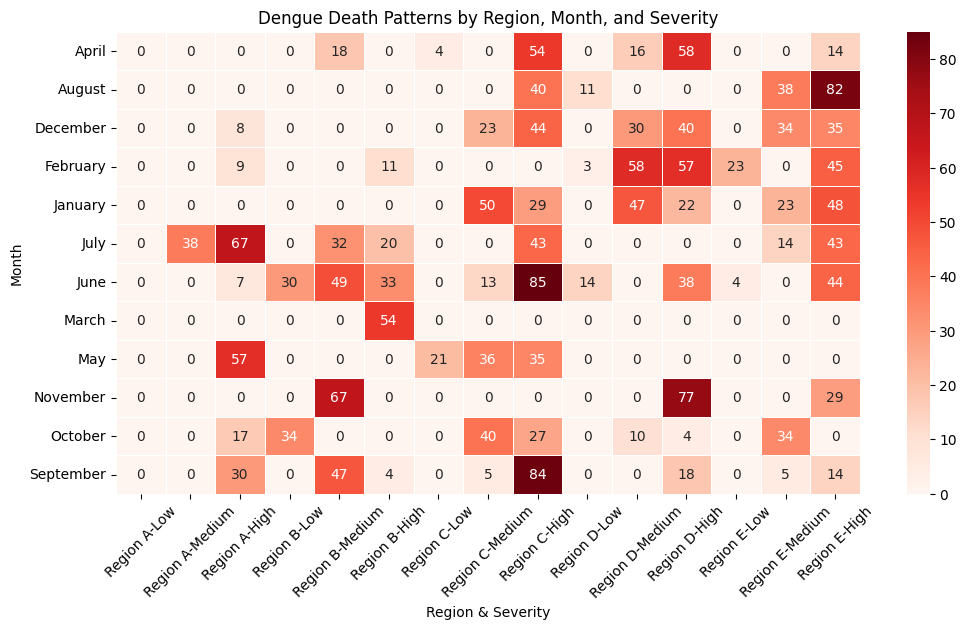

In [36]:
regions = ['Region A', 'Region B', 'Region C', 'Region D', 'Region E']
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

data = {
    'Region': np.random.choice(regions, 100),
    'Month': np.random.choice(months, 100),
    'Dengue_Cases': np.random.randint(10, 500, size=100),
    'Dengue_Deaths': np.random.randint(0, 50, size=100),
}

dengue_df = pd.DataFrame(data)

dengue_df['Severity'] = pd.cut(dengue_df['Dengue_Cases'], bins=[0, 50, 200, float('inf')], labels=['Low', 'Medium', 'High'])
death_patterns = dengue_df.groupby(['Region', 'Month', 'Severity'])['Dengue_Deaths'].sum().reset_index()

pivot_table = death_patterns.pivot_table(values='Dengue_Deaths', index='Month', columns=['Region', 'Severity'], aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="Reds", linewidths=0.5)
plt.title("Dengue Death Patterns by Region, Month, and Severity")
plt.xlabel("Region & Severity")
plt.ylabel("Month")
plt.xticks(rotation=45)
plt.show()


<h1> Question 20: </h1>

In [65]:
region_variance = dengue.groupby('Region')['Dengue_Cases'].var().reset_index()
region_variance = region_variance.rename(columns={'Dengue_Cases': 'Variance'})
top_regions = region_variance.sort_values(by='Variance', ascending=True).head(3)
print("Top 3 regions with the most consistent monthly dengue cases (lowest variance):")
print(top_regions)

Top 3 regions with the most consistent monthly dengue cases (lowest variance):
         Region       Variance
0         BARMM   36205.189548
14    Region XI  201092.473446
7   Region IV-B  224703.519492


<p> <strong> Insight 20 </strong> BARMM had the most stable monthly dengue case trends, showing the lowest variance at 36,205.19.</p>

In [ ]:
regions = ['Region A', 'Region B', 'Region C', 'Region D', 'Region E', 'Region F', 'Region G', 'Region H']
cases = np.random.randint(100, 1000, size=(12, len(regions)))  

dengue_df = pd.DataFrame(cases, columns=regions)
dengue_df['Month'] = np.arange(1, 13)
dengue_melted = dengue_df.melt(id_vars=['Month'], var_name='Region', value_name='Dengue_Cases')

region_variance = dengue_melted.groupby('Region')['Dengue_Cases'].var().reset_index()
region_variance = region_variance.rename(columns={'Dengue_Cases': 'Variance'})
top_regions = region_variance.sort_values(by='Variance', ascending=True).head(3)

print("Top 3 regions with the most consistent monthly dengue cases (lowest variance):")
print(top_regions)

plt.figure(figsize=(8, 5))
plt.bar(top_regions['Region'], top_regions['Variance'], color='green')
plt.xlabel("Region")
plt.ylabel("Variance in Dengue Cases")
plt.title("Top 3 Regions with the Most Consistent Monthly Dengue Cases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h1> Dengue Cases Trend from 2016 - 2020 </h1>

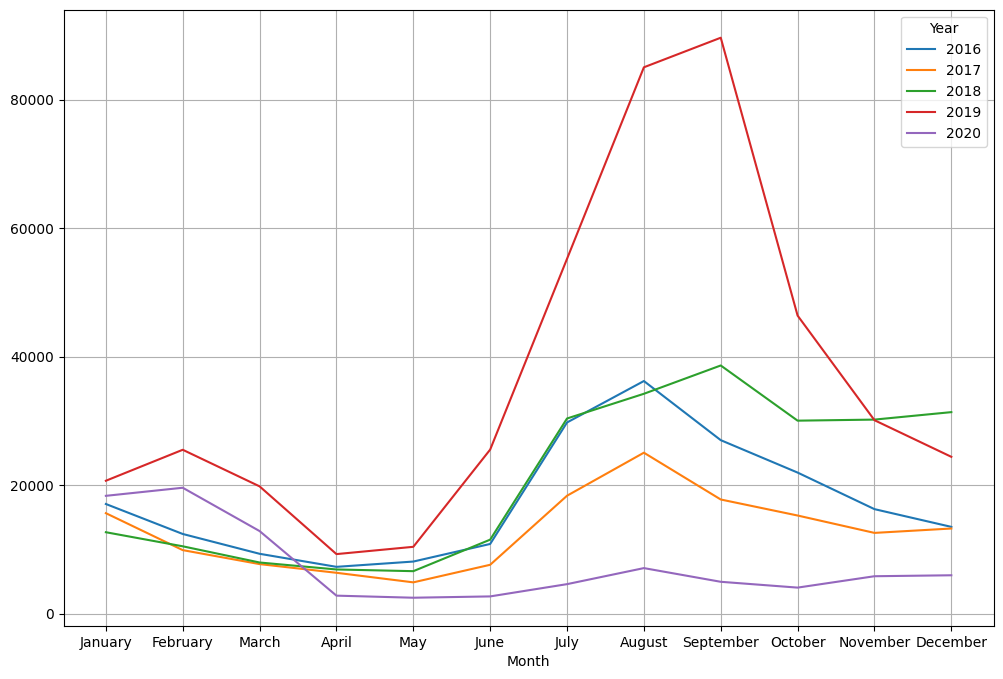

In [66]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<p> <strong> Insight 21 </strong> The Dengvaxia controversy highlights the devastating consequences of premature vaccine rollouts without thorough risk assessment. Sanofi’s late disclosure about its risks, after over 800,000 children had already been vaccinated, fueled public outrage and legal battles, eroding trust in the healthcare system. This mistrust had far-reaching effects, as plummeting immunization rates ultimately contributed to a measles outbreak in 2019.</p>